## 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. If your group consists of students from different classes, upload in **both** classes.

1. First we need to remove all the redundant columns. Please keep the following 22 columns and remove all others:

    id\
    name  
    host_id  
    host_name  
    neighbourhood_cleansed  
    latitude  
    longitude  
    room_type  
    price  
    minimum_nights  
    number_of_reviews  
    last_review  
    review_scores_rating  
    review_scores_accuracy  
    review_scores_cleanliness  
    review_scores_checkin  
    review_scores_communication  
    review_scores_location  
    review_scores_value  
    reviews_per_month  
    calculated_host_listings_count  
    availability_365



2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

4. Create a fitting word cloud based on the `name` column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.

7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

11. Supply a list of the top 10 highest rated listings and visualize them on a map.

12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

15. Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.


In [32]:
# Import
import numpy
import pandas


import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud
from matplotlib import pyplot as plt

import folium

import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Read the file

In [33]:
file_path = "listings.csv"

data = pandas.read_csv(file_path)
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,...,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,...,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,...,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220924142144,2022-09-25,city scrape,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,...,5.00,4.87,4.80,NaN,f,1,1,0,0,0.16
4,31094,https://www.airbnb.com/rooms/31094,20220924142144,2022-09-24,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.13


2. Lets remove redundant columns

In [34]:
columns_to_keep = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

data = data[columns_to_keep]


data.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0


In [35]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [36]:
# price is an object, lets change it to float
data["price"]

0          $898.00
1        $2,600.00
2        $3,250.00
3          $725.00
4        $1,954.00
           ...    
13810    $1,250.00
13811      $450.00
13812      $400.00
13813      $850.00
13814      $420.00
Name: price, Length: 13815, dtype: object

In [37]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)
data["price"]

0         898.0
1        2600.0
2        3250.0
3         725.0
4        1954.0
          ...  
13810    1250.0
13811     450.0
13812     400.0
13813     850.0
13814     420.0
Name: price, Length: 13815, dtype: float64

2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

In [38]:
data.shape

(13815, 22)

In [39]:

print("Number of rows before removing Nans and without reviews: " + str(len(data)))

# Remove all rows where number_of_reviews = 0
data = data[data['number_of_reviews'] != 0]

# Remove all rows with missing values
data = data.dropna()

data.head()

Number of rows before removing Nans and without reviews: 13815


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0


In [40]:
print("Number of rows after removing Nans and without reviews: " + str(len(data)))

Number of rows after removing Nans and without reviews: 12126


3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

In [41]:
neighbourhoods = data['neighbourhood_cleansed'].unique()
print(neighbourhoods)

# Now we need to fix the neighbourhoods with æ ø å

# Define a mapping of incorrect names to correct names
character_mapping = {
    'Nrrebro': 'Nørrebro',
    'sterbro': 'Østerbro',
    'Vanlse': 'Vanløse',
    'Amager st': 'Amager strand',
    'Brnshj-Husum': 'Brønshøj-Husum',
}

data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].replace(character_mapping)

print()

print(data['neighbourhood_cleansed'].unique())

['Nrrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'sterbro' 'Amager Vest'
 'Frederiksberg' 'Amager st' 'Valby' 'Bispebjerg' 'Vanlse' 'Brnshj-Husum']

['Nørrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'Østerbro'
 'Amager Vest' 'Frederiksberg' 'Amager strand' 'Valby' 'Bispebjerg'
 'Vanløse' 'Brønshøj-Husum']


4.Create a fitting word cloud based on the name column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word ‘Copenhagen’ is redundant).

In [42]:
names = data['name']

print(names.unique(), "\n\n")

# Lets remove non-descriptive stop words
names = names.fillna('')
names = names.str.lower()
stop_words = ['københavn','cph','copenhagen']

stop_words.extend(stopwords.words('danish'))
stop_words.extend(stopwords.words('english'))

print(stop_words)

["Copenhagen 'N Livin'" 'Lovely house - most attractive area'
 'City Centre Townhouse Sleeps 1-10 persons' ...
 'Dejligt lille hus med flere hyggekroge ude og inde'
 'Lejlighed i Storkøbenhavn. 13 minutter fra centrum'
 'Big Bedroom connected with a large living room'] 


['københavn', 'cph', 'copenhagen', 'og', 'i', 'jeg', 'det', 'at', 'en', 'den', 'til', 'er', 'som', 'på', 'de', 'med', 'han', 'af', 'for', 'ikke', 'der', 'var', 'mig', 'sig', 'men', 'et', 'har', 'om', 'vi', 'min', 'havde', 'ham', 'hun', 'nu', 'over', 'da', 'fra', 'du', 'ud', 'sin', 'dem', 'os', 'op', 'man', 'hans', 'hvor', 'eller', 'hvad', 'skal', 'selv', 'her', 'alle', 'vil', 'blev', 'kunne', 'ind', 'når', 'være', 'dog', 'noget', 'ville', 'jo', 'deres', 'efter', 'ned', 'skulle', 'denne', 'end', 'dette', 'mit', 'også', 'under', 'have', 'dig', 'anden', 'hende', 'mine', 'alt', 'meget', 'sit', 'sine', 'vor', 'mod', 'disse', 'hvis', 'din', 'nogle', 'hos', 'blive', 'mange', 'ad', 'bliver', 'hendes', 'været', 'thi', 'jer', '

In [43]:
stop_words = [word.lower() for word in stop_words]
for word in stop_words:
    names = names.str.replace(r'\b{}\b'.format(word), '', regex=True)

In [44]:
pandas.Series(" ".join(names).split()).value_counts().head(10)

apartment    4361
lejlighed    1369
cozy         1221
central      1090
-            1071
room          937
city          935
close         932
nørrebro      869
heart         866
Name: count, dtype: int64

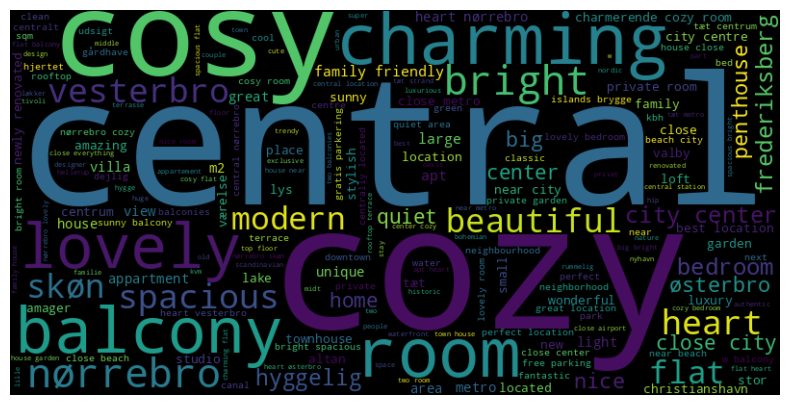

In [45]:
# Lets create a wordcloud
# wordcloud = WordCloud(width=800, height=400).generate(' '.join(names))

additional_stopwords = ["apartment", "lejlighed"]
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=additional_stopwords).generate(' '.join(names))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

In [46]:
host_names = data['host_name']
host_names.unique()

array(['Simon', 'Kari', 'Julia', ..., 'Julie & Jakob', 'Martin Raae',
       'Rakul'], dtype=object)

In [47]:
host_names.value_counts()

host_name
ApartmentinCopenhagen    134
Mette                    131
Christian                116
Julie                    107
Maria                    104
                        ... 
Ditte Lundqvist            1
Eske                       1
Mina                       1
Yoav                       1
Rakul                      1
Name: count, Length: 3448, dtype: int64

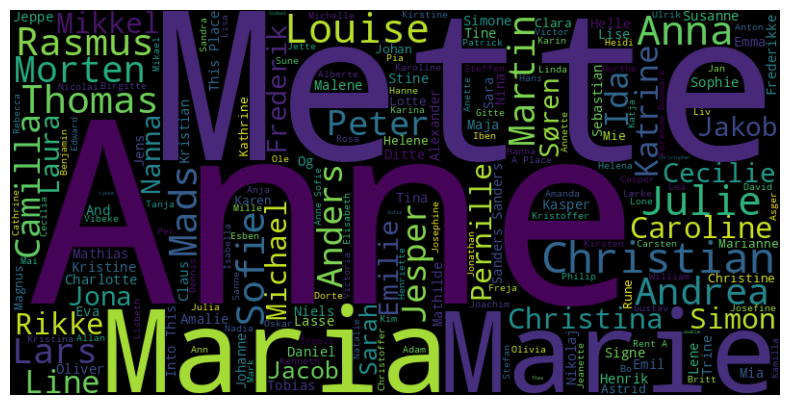

In [48]:
non_names = ["ApartmentinCopenhagen"]
wordcloud2 = WordCloud(width=800, height=400, background_color='black', stopwords=non_names).generate(' '.join(host_names))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.

In [49]:
# Define the bin edges, including the last bin for values greater than $10,000
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]

# Define descriptive bin labels
bin_labels = [
    'Up to $1,000',
    '$1,001 - $2,000',
    '$2,001 - $3,000',
    '$3,001 - $4,000',
    '$4,001 - $5,000',
    '$5,001 - $6,000',
    '$6,001 - $7,000',
    '$7,001 - $8,000',
    '$8,001 - $9,000',
    '$9,001 - $10,000',
    '>$10,000'
]

# Create a new column 'Price_Bin' with the descriptive bin labels
data['price_bin'] = pandas.cut(data['price'], bins=bin_edges, labels=bin_labels, right=False)

# Print the DataFrame to see the new column
data[["id", "price", "price_bin"]]

,id,price,price_bin
0,6983,898.0,"Up to $1,000"
1,26057,2600.0,"$2,001 - $3,000"
2,26473,3250.0,"$3,001 - $4,000"
3,29118,725.0,"Up to $1,000"
4,31094,1954.0,"$1,001 - $2,000"
...,...,...,...
13808,646726550705810749,856.0,"Up to $1,000"
13809,646941499450912133,1050.0,"$1,001 - $2,000"
13811,647809303952891559,450.0,"Up to $1,000"
13812,650819220455514228,400.0,"Up to $1,000"


7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

In [50]:
# Plot the listings data on a map
smaller_data = data.sample(n = 10, random_state=1)
# The min zoom level is set to 12 to avoid showing the entire world map
map = folium.Map(location =[smaller_data['latitude'].mean(), smaller_data['longitude'].mean()], zoom_start=12, min_zoom=12)

In [51]:
bin_colors = {
    'Up to $1,000': 'blue',
    '$1,001 - $2,000': 'green',
    '$2,001 - $3,000': 'orange',
    '$3,001 - $4,000': 'red',
    '$4,001 - $5,000': 'purple',
    '$5,001 - $6,000': 'darkblue',
    '$6,001 - $7,000': 'darkgreen',
    '$7,001 - $8,000': 'cadetblue',
    '$8,001 - $9,000': 'cyan',
    '$9,001 - $10,000': 'darkred',
    '>$10,000': 'black'
}

for _, row in smaller_data.iterrows():
    color = bin_colors[row['price_bin']]
    folium.Marker(location=[row['latitude'], row['longitude']],
                  icon=folium.Icon(color=color,icon='home'),
                  popup=f"Price: ${row['price']}<br>Neighborhood: {row['neighbourhood_cleansed']}"
                  ).add_to(map)

In [52]:
map

In [53]:
map.save('listings_map.html')

In [54]:
# Create a plot grouping the listings by neighborhood
neighbourhoods_price_bins_counts = data.groupby(['neighbourhood_cleansed', 'price_bin']).size().unstack(fill_value=0)
neighbourhoods_price_bins_counts

C:\Users\himal\AppData\Local\Temp\ipykernel_37912\3870246271.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighbourhoods_price_bins_counts = data.groupby(['neighbourhood_cleansed', 'price_bin']).size().unstack(fill_value=0)


price_bin,"Up to $1,000","$1,001 - $2,000","$2,001 - $3,000","$3,001 - $4,000","$4,001 - $5,000","$5,001 - $6,000","$6,001 - $7,000","$7,001 - $8,000","$8,001 - $9,000","$9,001 - $10,000",">$10,000"
neighbourhood_cleansed,,,,,,,,,,,
Amager Vest,522,453,61,12,3,1,1,4,0,0,2
Amager strand,561,299,46,8,7,1,1,0,0,0,1
Bispebjerg,464,114,17,7,0,1,0,0,0,0,1
Brønshøj-Husum,195,78,10,1,1,0,0,0,0,0,0
Frederiksberg,574,502,67,20,3,6,2,1,0,0,2
Indre By,475,967,291,60,24,10,2,9,2,1,3
Nørrebro,1241,731,66,6,4,4,1,2,1,0,1
Valby,352,168,11,5,1,0,0,2,0,0,0
Vanløse,206,83,6,3,0,0,0,0,0,0,0


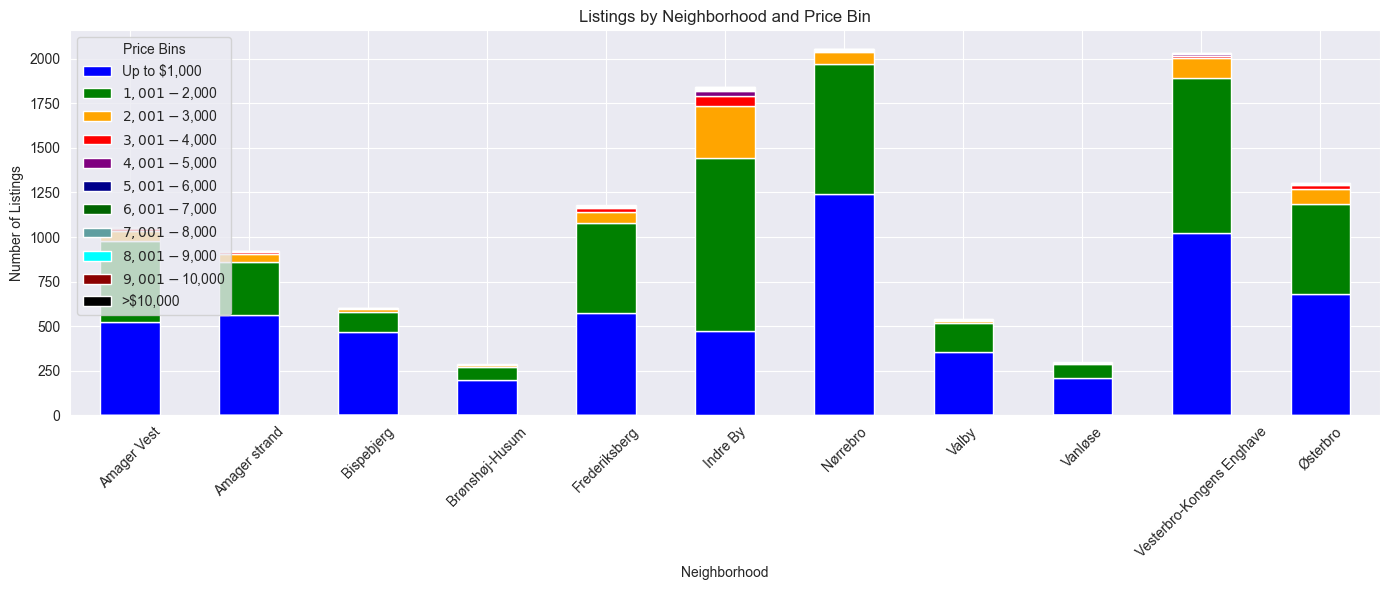

In [55]:
neighbourhoods_price_bins_counts.plot(kind='bar', stacked=True, color = [bin_colors[col] for col in neighbourhoods_price_bins_counts.columns], figsize=(14, 6))
plt.title('Listings by Neighborhood and Price Bin')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Price Bins', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
neighbourhoods_price_bins_counts = data.groupby(['neighbourhood_cleansed', 'price_bin']).size().reset_index().rename(columns={0:'count'})
neighbourhoods_price_bins_counts

C:\Users\himal\AppData\Local\Temp\ipykernel_37912\1669303328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighbourhoods_price_bins_counts = data.groupby(['neighbourhood_cleansed', 'price_bin']).size().reset_index().rename(columns={0:'count'})


,neighbourhood_cleansed,price_bin,count
0,Amager Vest,"Up to $1,000",522
1,Amager Vest,"$1,001 - $2,000",453
2,Amager Vest,"$2,001 - $3,000",61
3,Amager Vest,"$3,001 - $4,000",12
4,Amager Vest,"$4,001 - $5,000",3
...,...,...,...
116,Østerbro,"$6,001 - $7,000",2
117,Østerbro,"$7,001 - $8,000",2
118,Østerbro,"$8,001 - $9,000",0
119,Østerbro,"$9,001 - $10,000",2


C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


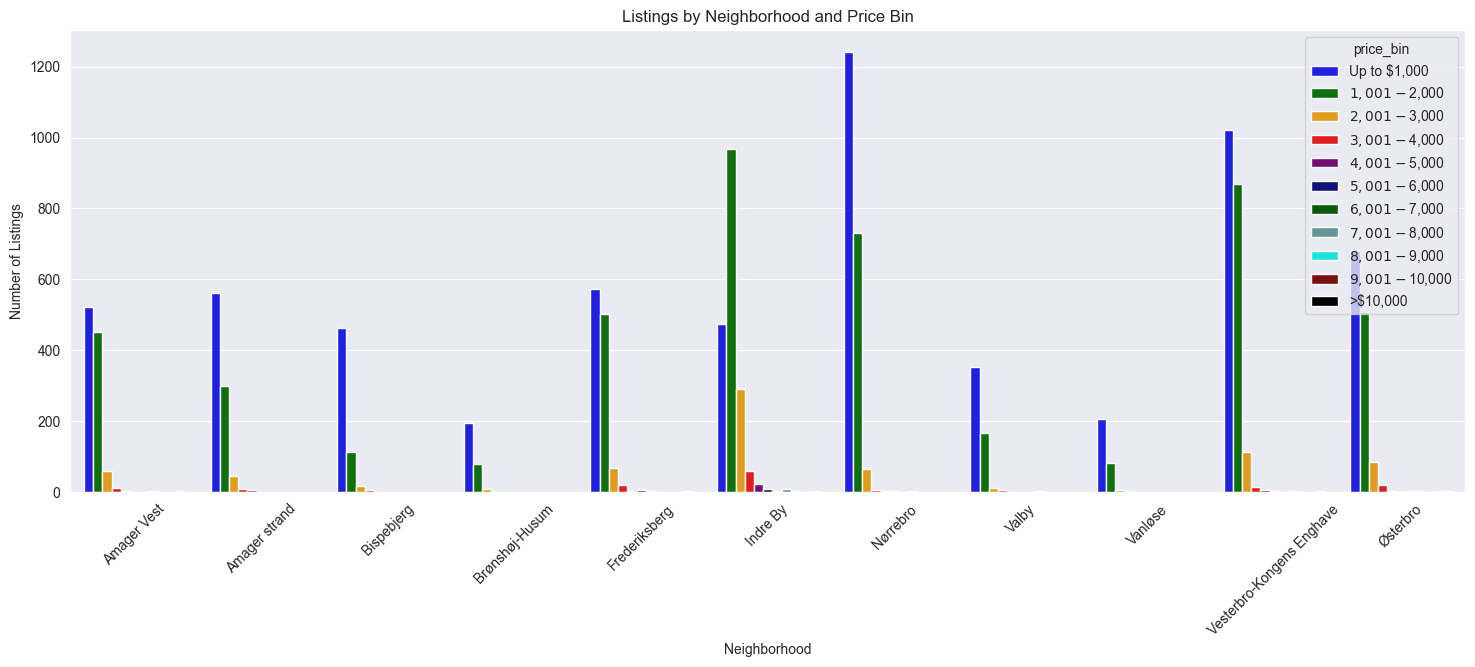

In [57]:
plt.figure(figsize=(18, 6))
sns.barplot(data=neighbourhoods_price_bins_counts, x="neighbourhood_cleansed", y="count", hue="price_bin", palette=list(bin_colors.values()))
plt.xticks(rotation=45)
plt.title("Listings by Neighborhood and Price Bin")
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.margins(x=0.01)
plt.show()                              

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


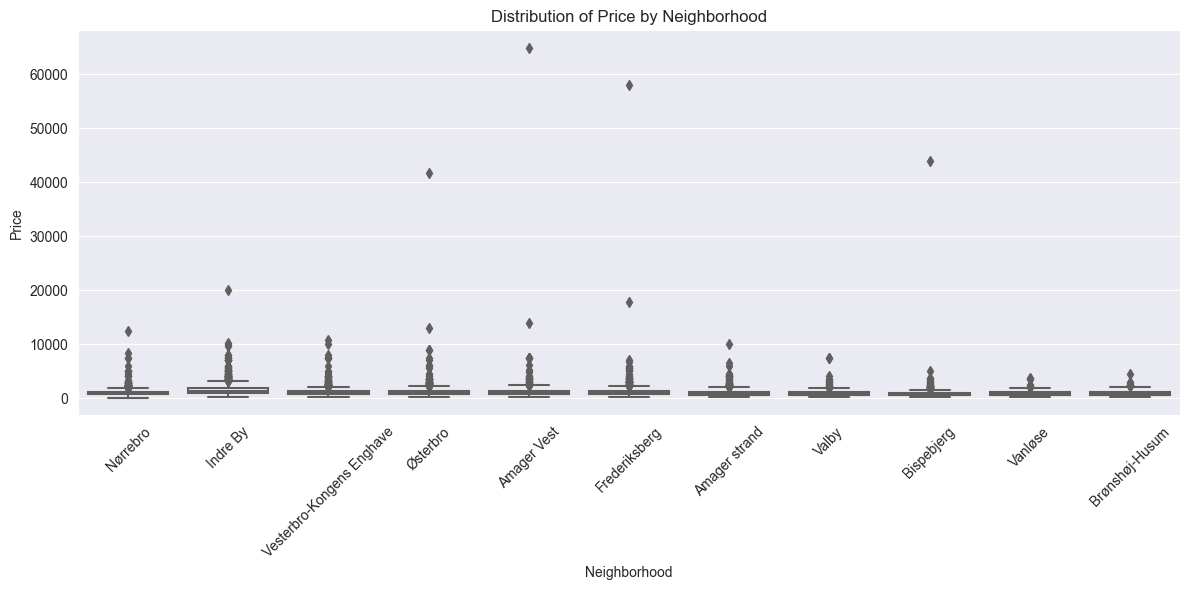

In [58]:
# Create a boxplot of reviews per month by neighborhood using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=data, palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribution of Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.tight_layout()
# Show the boxplot
plt.show()

In [59]:
print(data.price.max())
print(data.price.mean())
print(data.price.min())

64900.0
1155.4548903183243
79.0


We can see that the prices have really big outliers which doesnt make sense to include in our dataset since it might affect our analysis and any future ML models.

In [60]:
data[numpy.abs(stats.zscore(data["price"])) > 3]

# THESE ARE OUR OUTLIERS FOR PRICE

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bin
217,866427,160m2 by the water w/balcony & wooden stove,4438772,Philip & Karen,Indre By,55.676850,12.588130,Entire home/apt,5686.0,2,...,4.95,4.88,4.93,4.89,4.93,4.74,0.59,1,203,"$5,001 - $6,000"
531,1826760,Grand and spacious apartment in central CPH,9558373,Johannes,Indre By,55.679070,12.563630,Entire home/apt,5200.0,2,...,5.00,5.00,5.00,5.00,5.00,5.00,0.06,1,108,"$5,001 - $6,000"
632,2360896,Large luxury flat overlooking Tour de France 2022,9900508,Camilla,Indre By,55.680222,12.563674,Entire home/apt,8000.0,3,...,4.88,5.00,4.94,4.94,5.00,4.88,0.16,1,153,"$8,001 - $9,000"
653,2463144,Lovely room in inner Nørrebro!,12596222,Linnea,Nørrebro,55.688480,12.554160,Private room,5000.0,2,...,4.97,4.91,4.87,4.93,4.90,4.83,0.88,1,12,"$5,001 - $6,000"
825,3211312,"Fantastisk hus, nær dejlig strand",16269864,Lasse,Amager strand,55.656890,12.635850,Entire home/apt,5995.0,2,...,4.92,4.88,4.96,5.00,4.98,4.80,0.68,1,189,"$5,001 - $6,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10416,604790236869917529,Penthouse w/rooftop terrace in latin quarter,5096702,Margot & Christian,Indre By,55.677580,12.568670,Entire home/apt,5315.0,2,...,4.27,4.18,5.00,4.64,4.64,4.18,3.11,2,65,"$5,001 - $6,000"
10461,607925073408332441,"Big house, central CPH, Scandinavian design",4605845,Steffen,Frederiksberg,55.693030,12.525210,Entire home/apt,5500.0,3,...,4.67,4.67,5.00,5.00,4.67,4.67,1.02,1,332,"$5,001 - $6,000"
11375,645635742364082802,Exclusive 260m2 apartment in central Copenhagen,171269805,Hannah,Østerbro,55.706000,12.577476,Entire home/apt,9000.0,2,...,5.00,5.00,5.00,5.00,5.00,5.00,0.65,1,328,"$9,001 - $10,000"
11518,649757785139921922,Cozy apartment in the heart of Copenhagen,398752517,Iben,Indre By,55.678182,12.582675,Entire home/apt,7000.0,2,...,5.00,4.75,4.75,5.00,5.00,4.50,1.40,1,364,"$7,001 - $8,000"


In [61]:
price_cleaned_data = data[numpy.abs(stats.zscore(data["price"])) < 3]
price_cleaned_data

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bin
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,"Up to $1,000"
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,"$2,001 - $3,000"
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,"$3,001 - $4,000"
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,"Up to $1,000"
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,"$1,001 - $2,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brønshøj-Husum,55.739028,12.487433,Entire home/apt,856.0,6,...,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0,"Up to $1,000"
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,1050.0,2,...,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0,"$1,001 - $2,000"
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,450.0,3,...,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0,"Up to $1,000"
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,400.0,1,...,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0,"Up to $1,000"


C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


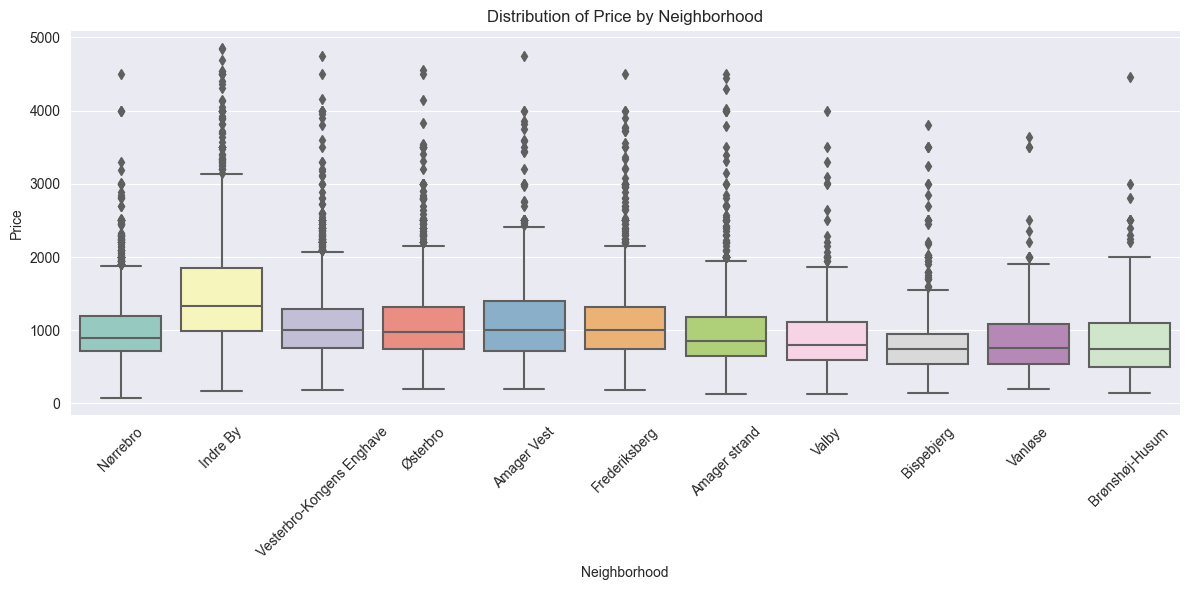

In [62]:
# Create a boxplot of reviews per month by neighborhood using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=price_cleaned_data, palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribution of Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.tight_layout()
# Show the boxplot
plt.show()

We can see that the median price is generally highest at the Indre By.

C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


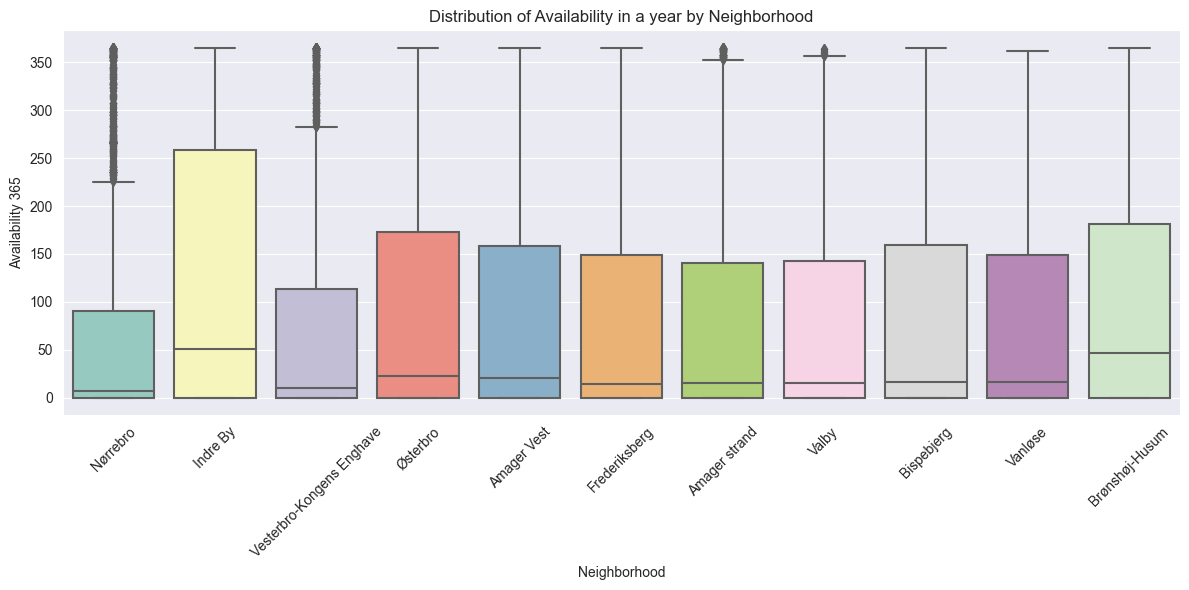

In [63]:

# Create a boxplot of availaility by neighborhood using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='availability_365', data=price_cleaned_data, palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribution of Availability in a year by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Availability 365')
plt.tight_layout()
# Show the boxplot
plt.show()



The above boxplot shows the distribution of reviews per month by neighborhood. The boxplot shows that the Norrebro has the lowest median available days which means that the listings in Norrebro are more popular than the other neighborhoods. There are some places in Norrebro which are really popular and others are really ignored which is shown by the low median and high numbers of outliers.
Similarly, the highest median available days are in IndreBy showing the lack of popularity compared to other neighborhoods.
 
This also corelates to the earlier analysis that the average median price was generally higher in Indre By while the Norreport was in the lower paradigm.

9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

In [64]:
data.value_counts("host_name")[:10].reset_index(name="count")

,host_name,count
0,ApartmentinCopenhagen,134
1,Mette,131
2,Christian,116
3,Julie,107
4,Maria,104
5,Anne,96
6,Anna,96
7,Mads,94
8,Louise,92
9,Rasmus,92


C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


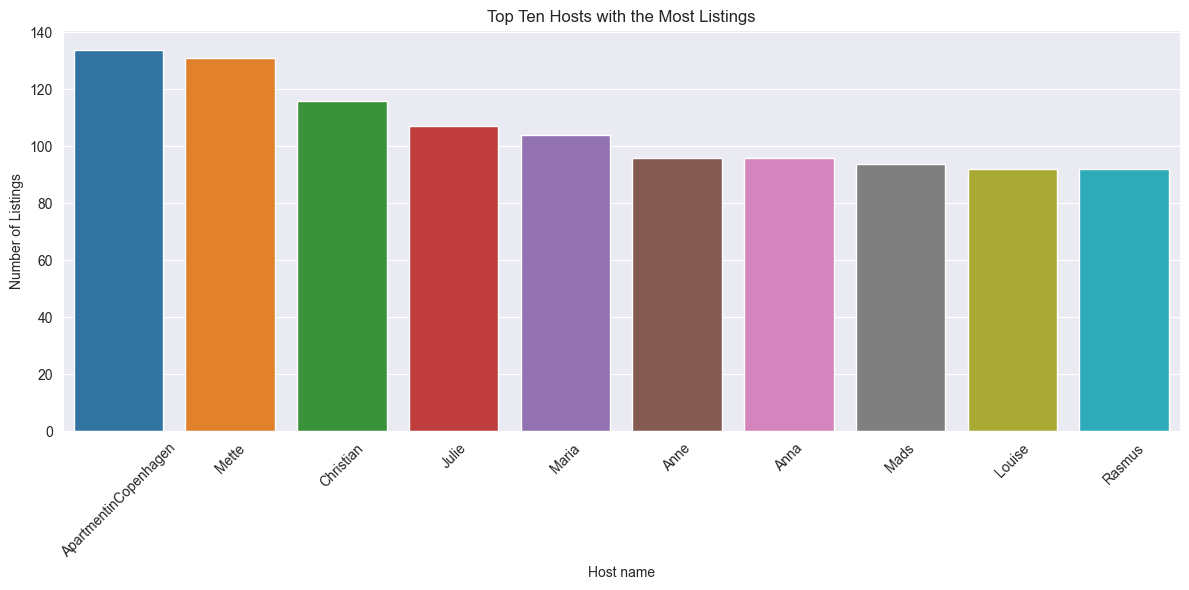

In [65]:
# Group the data by host_id and count the number of listings for each host
top_ten_hosts = data.value_counts("host_name")[:10].reset_index(name="count")
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data = top_ten_hosts, x='host_name', y='count')
plt.title('Top Ten Hosts with the Most Listings')
plt.xlabel('Host name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()


10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [66]:
subset_data = data[['neighbourhood_cleansed', 'room_type', "price"]]

subset_data.groupby(['neighbourhood_cleansed', 'room_type']).agg(['mean', 'median', 'std', 'var', 'min', 'max', ("mode", pandas.Series.mode),  ("first quartile", lambda x: x.quantile(0.25)), ("third quartile", lambda x: x.quantile(0.75))])

price                       \
                                                  mean  median          std   
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt  1234.226623  1050.0   832.696891   
                          Private room     1032.966216   500.0  5299.018095   
                          Shared room      1051.500000  1051.5   112.429978   
Amager strand             Entire home/apt  1093.584071   900.0   721.982284   
                          Hotel room       1296.000000  1201.0   211.184753   
                          Private room      549.325581   471.0   293.995992   
                          Shared room      2575.000000  2575.0          NaN   
Bispebjerg                Entire home/apt   992.592520   800.0  1981.580545   
                          Private room      488.978947   400.0   353.674089   
                          Shared room       198.000000   198.0          NaN   
Brønshøj-Husum            Entire home/apt  1014.995370   900.0   555.669548   
                          Private room      445.552239   400.0   201.631624   
                          Shared room       211.500000   211.5    16.263456   
Frederiksberg             Entire home/apt  1292.472222  1037.0  1958.802772   
                          Private room      621.706767   500.0   567.611220   
Indre By                  Entire home/apt  1642.387192  1400.0  1072.616232   
                          Hotel room       1077.200000  1306.0   654.255098   
                          Private room      698.984375   582.0   380.070466   
                          Shared room       292.000000   280.0    67.577116   
Nørrebro                  Entire home/apt  1047.742192   950.0   583.703218   
                          Private room      650.121212   500.0   760.270040   
                          Shared room       324.666667   400.0   130.481161   
Valby                     Entire home/apt  1017.968889   899.0   635.434691   
                          Private room      498.157303   438.0   288.616366   
Vanløse                   Entire home/apt   954.425197   826.5   496.658320   
                          Private room      413.409091   337.5   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1181.435119  1000.0   698.122481   
                          Private room      574.366516   500.0   295.726896   
                          Shared room       330.500000   330.5   113.844192   
Østerbro                  Entire home/apt  1248.551107  1000.0  1438.908216   
                          Private room      605.461538   500.0   437.259030   
                          Shared room       469.000000   469.0          NaN   

                                                                          \
                                                    var     min      max   
neighbourhood_cleansed    room_type                                        
Amager Vest               Entire home/apt  6.933841e+05   250.0  14000.0   
                          Private room     2.807959e+07   200.0  64900.0   
                          Shared room      1.264050e+04   972.0   1131.0   
Amager strand             Entire home/apt  5.212584e+05   240.0  10000.0   
                          Hotel room       4.459900e+04  1149.0   1538.0   
                          Private room     8.643364e+04   135.0   2000.0   
                          Shared room               NaN  2575.0   2575.0   
Bispebjerg                Entire home/apt  3.926661e+06   235.0  44000.0   
                          Private room     1.250854e+05   143.0   3000.0   
                          Shared room               NaN   198.0    198.0   
Brønshøj-Husum            Entire home/apt  3.087686e+05   250.0   4462.0   
                          Private room     4.065531e+04   145.0   1200.0   
                          Shared room      2.645000e+02   200.0    223.0   
Frederiksberg             Entire home/apt  3.836908e+06   300.0  58

11. Supply a list of the top 10 highest rated listings and visualize them on a map.


In [67]:
highest_rated_listings = data.nlargest(10, 'review_scores_rating')

# Create a map
# The min zoom level is set to 12 to avoid showing the entire world map
m = folium.Map(location =[highest_rated_listings['latitude'].mean(), highest_rated_listings['longitude'].mean()], zoom_start=12, min_zoom=12)


for _, row in highest_rated_listings.iterrows():
    folium.Marker(
       [row['latitude'], row['longitude']],
         icon=folium.Icon(icon='home'),
        popup=f"Price: ${row['price']}<br>Neighborhood: {row['neighbourhood_cleansed']}"
    ).add_to(m)

m.save('listings_map_by_review_score_rating.html')
m

12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

In [68]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_bin'],
      dtype='object')

In [69]:
data.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bin
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,"Up to $1,000"
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,"$2,001 - $3,000"
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,"$3,001 - $4,000"
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,"Up to $1,000"
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,"$1,001 - $2,000"


In [70]:
feature_columns = ['host_id', 'neighbourhood_cleansed', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month','calculated_host_listings_count', 'availability_365']

data_filtered = data[feature_columns].copy()
data_filtered.dtypes

host_id                             int64
neighbourhood_cleansed             object
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [71]:
data_filtered["room_type"] = data_filtered["room_type"].astype("category")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].astype("category")

data_filtered.dtypes

host_id                              int64
neighbourhood_cleansed            category
room_type                         category
price                              float64
minimum_nights                       int64
number_of_reviews                    int64
review_scores_rating               float64
review_scores_accuracy             float64
review_scores_cleanliness          float64
review_scores_checkin              float64
review_scores_communication        float64
review_scores_location             float64
review_scores_value                float64
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

In [72]:
data_filtered["room_type_code"] = data_filtered["room_type"].cat.codes
data_filtered["neighbourhood_cleansed_code"] = data_filtered["neighbourhood_cleansed"].cat.codes

data_filtered.dtypes

host_id                              int64
neighbourhood_cleansed            category
room_type                         category
price                              float64
minimum_nights                       int64
number_of_reviews                    int64
review_scores_rating               float64
review_scores_accuracy             float64
review_scores_cleanliness          float64
review_scores_checkin              float64
review_scores_communication        float64
review_scores_location             float64
review_scores_value                float64
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
room_type_code                        int8
neighbourhood_cleansed_code           int8
dtype: object

In [73]:
room_type_dict = dict(enumerate(data_filtered["room_type"].cat.categories))
neighbourhood_cleansed_dict = dict(enumerate(data_filtered["neighbourhood_cleansed"].cat.categories))

In [74]:
print(room_type_dict,"\n\n", neighbourhood_cleansed_dict)

{0: 'Entire home/apt', 1: 'Hotel room', 2: 'Private room', 3: 'Shared room'} 

 {0: 'Amager Vest', 1: 'Amager strand', 2: 'Bispebjerg', 3: 'Brønshøj-Husum', 4: 'Frederiksberg', 5: 'Indre By', 6: 'Nørrebro', 7: 'Valby', 8: 'Vanløse', 9: 'Vesterbro-Kongens Enghave', 10: 'Østerbro'}


In [75]:
data_filtered = data_filtered.drop(columns=["neighbourhood_cleansed", "room_type"])
data_filtered

,host_id,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_cleansed_code
0,16774,898.0,3,172,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0,6
1,109777,2600.0,4,59,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,0,5
2,112210,3250.0,3,300,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,0,5
3,125230,725.0,7,24,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0,9
4,129976,1954.0,3,19,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,54229471,856.0,6,4,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0,0,3
13809,141288846,1050.0,2,4,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0,0,2
13811,4862421,450.0,3,3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0,0,7
13812,134647873,400.0,1,3,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0,0,7


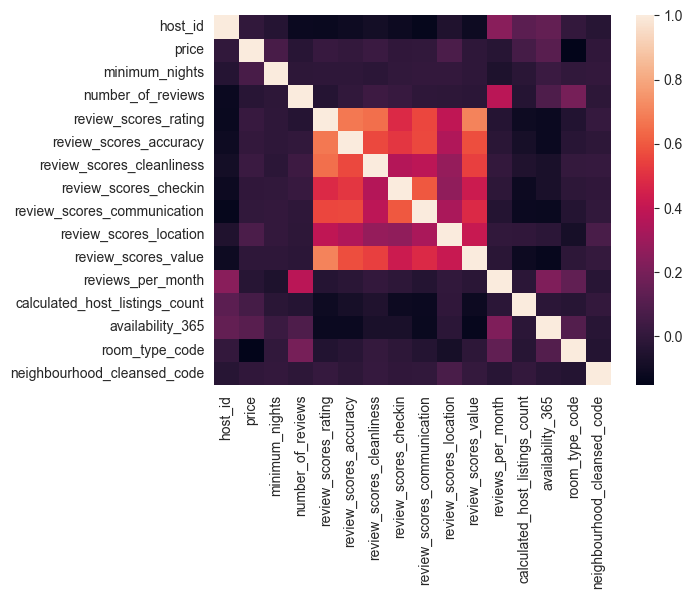

In [76]:
sns.heatmap(data_filtered.corr())
plt.show()

The above plot shows the co-relation among all the columns. It can be seen that the reviews values are mostly co-related with each other which makes sense.
Also, hostId is co-related more or less with the reviews per month which might suggest that some hosts ask their consumers to give them the reviews.

In [77]:
#Checking cases where all columns are outliers
(numpy.abs(stats.zscore(data_filtered)) > 3).all(axis=1).sum()

0

Checking cases where all columns are outliers showed there are none of such cases.


13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

In [78]:
median_value = data_filtered['price'].median()
data_filtered['price_category'] = numpy.where(data_filtered['price'] > median_value, 1, 0)

# Print the DataFrame to see the new column
data_filtered.head()

,host_id,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_cleansed_code,price_category
0,16774,898.0,3,172,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0,6,0
1,109777,2600.0,4,59,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,0,5,1
2,112210,3250.0,3,300,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,0,5,1
3,125230,725.0,7,24,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0,9,0
4,129976,1954.0,3,19,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,0,9,1


14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

**We want to predict price category, so we will remove price**

In [79]:
data_filtered = data_filtered.drop(columns=["price"])

In [80]:
data_filtered.head()

,host_id,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_cleansed_code,price_category
0,16774,3,172,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0,6,0
1,109777,4,59,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,0,5,1
2,112210,3,300,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,0,5,1
3,125230,7,24,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0,9,0
4,129976,3,19,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,0,9,1


In [81]:
X = data_filtered.drop(columns=["price_category"])
y = data_filtered["price_category"]


scaler = MinMaxScaler()
X = scaler.fit_transform(X=X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8488, 15), (3638, 15), (8488,), (3638,))

We will be experimenting with Bernoulli Naive Bayes as we have binary data. 
[Naive Bayes Algorithm](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html)

In [83]:
bnb = BernoulliNB(binarize=0.0)

In [84]:
bnb.fit(X_train, y_train)
y_bnb_pred = bnb.predict(X_test)

In [85]:
bnb.score(X_test, y_test)

0.6610775151181968

In [86]:
cm = confusion_matrix(y_test, y_bnb_pred)
cm

array([[1052,  731],
       [ 502, 1353]], dtype=int64)

Confusion matrix shows the values as

[[True Negative, False Positive]<br>
[False Negative, True Positive ]]

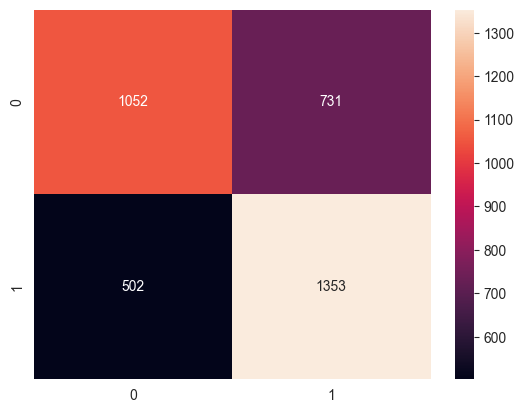

In [87]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

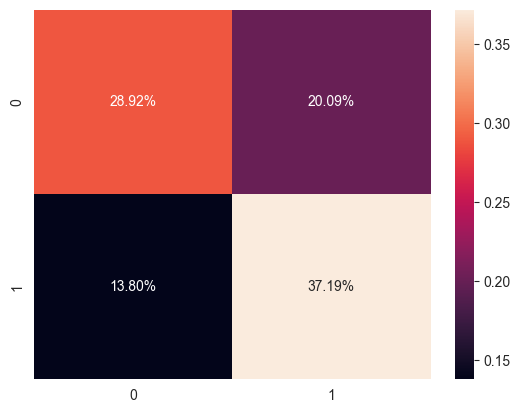

In [88]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
plt.show()

In [89]:
knn = KNeighborsClassifier()

In [90]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
y_pred_knn = knn.predict(X_test)

In [92]:
knn.score(X_test, y_test)

0.6558548653106102

In [93]:
len(y_test)

3638

C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\himal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

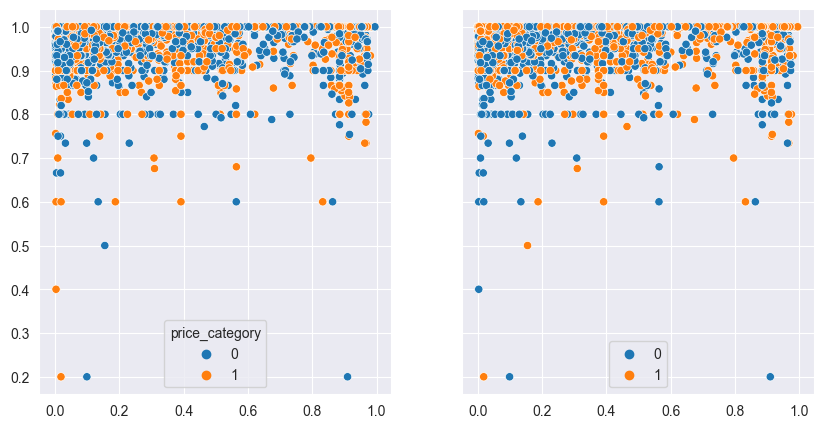

In [94]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 4], hue=y_test, ax=axs[0])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 4], hue=y_pred_knn, ax=axs[1])
plt.show()